# HTTP协议简介


HTTP是Hyper Text Transfer Protocol（超文本传输协议）的缩写, 是用于万维网（WWW:World Wide Web）服务器与本地浏览器之间传输超文本的传送协议。

HTTP是一个属于应用层的协议，是文本协议，所以我们看到在web开发过程中http的报文都是字符串。

# get与post

* GET提交的数据会放在URL之后，以?分割URL和传输数据，参数之间以&相连，如EditBook?name=test1&id=123456. POST方法是把提交的数据放在HTTP包的请求体中.
* GET提交的数据大小有限制（因为浏览器对URL的长度有限制），而<font color="red">POST方法提交的数据没有限制.</font>
* GET与POST请求在服务端获取请求数据方式不同。

# 请求头和响应头

## 请求头

|协议头	|说明	|示例|
|---|---|---|
|Accept	|可接受的响应内容类型（Content-Types）|	Accept: text/plain	
|Accept-Charset	|可接受的字符集|	Accept-Charset: utf-8|
|Accept-Encoding|	可接受的响应内容的编码方式。	|Accept-Encoding: gzip, deflate	
|Connection|	客户端（浏览器）想要优先使用的连接类型	|Connection: keep-alive, Connection: Upgrade
|Cookie	|由之前服务器通过Set-Cookie（见下文）设置的一个HTTP协议Cookie	|Cookie: $Version=1; Skin=new;
|Content-Length|	以8进制表示的请求体的长度|	Content-Length: 348	固定
|Content-Type|	请求体的MIME类型 （用于POST和PUT请求中）|	Content-Type: application/x-www-form-urlencoded	
|Date	|发送该消息的日期和时间（以RFC 7231中定义的"HTTP日期"格式来发送）|	Date: Dec, 26 Dec 2015 17:30:00 GMT	
|Host	|表示服务器的域名以及服务器所监听的端口号。如果所请求的端口是对应的服务的标准端口（80），则端口号可以省略。|Host: www.itbilu.com
|Origin	|发起一个针对跨域资源共享的请求（该请求要求服务器在响应中加入一个Access-Control-Allow-Origin的消息头，表示访问控制所允许的来源）。|Origin: http://www.itbilu.com
|Referer| 表示浏览器所访问的前一个页面，可以认为是之前访问页面的链接将浏览器带到了当前页面。Referer其实是Referrer这个单词，但RFC制作标准时给拼错了，后来也就将错就错使用Referer了|	Referer: http://www.baidu.com/
|User-Agent|	浏览器的身份标识字符串	| User-Agent: Mozilla/……
|Upgrade| 要求服务器升级到一个高版本协议|Upgrade: HTTP/2.0, SHTTP/1.3, IRC/6.9, RTA/x11	



其实在页面缓存这一块，有不同的几个头可以控制页面缓存：
1. Expires / Cache-Control：

    当服务器发出响应的时候，可以通过两种方式来告诉客户端缓存请求：

    第一种是Expires，比如：

    Expires: Sun, 16 Oct 2016 05:43:02 GMT

    在此日期之前，客户端都会认为缓存是有效的。

    不过Expires有缺点，比如说，服务端和客户端的时间设置可能不同，这就会使缓存的失效可能并不能精确的按服务器的预期进行。

    第二种是Cache-Control，比如：

    Cache-Control: max-age=315360000

    这里声明的是一个相对的秒数，表示从现在起，315360000秒内缓存都是有效的，这样就避免了服务端和客户端时间不一致的问题。

    但是Cache-Control是HTTP1.1才有的，不适用与HTTP1.0，而Expires既适用于HTTP1.0，也适用于HTTP1.1，所 以说在大多数情况下同时发送这两个头会是一个更好的选择，当客户端两种头都能解析的时候，会优先使用Cache-Control。

2. Last-Modified / If-Modified-Since

    If-Modified-Since和 Last-Modified 一样都是用于记录页面最后修改时间的 HTTP 头信息，只是 Last-Modified 是由服务器往客户端发送的 HTTP 头，而 If-Modified-Since 则是由客户端往服务器发送的头，可 以看到，再次请求本地存在的 cache 页面时，客户端会通过 If-Modified-Since 头将先前服务器端发过来的 Last-Modified 最后修改时间戳发送回去，这是为了让服务器端进行验证，通过这个时间戳判断客户端的页面是否是最新的，如果不是最新的，则返回新的内容，如果是最新的，则 返回 304 告诉客户端其本地 cache 的页面是最新的，于是客户端就可以直接从本地加载页面了，这样在网络上传输的数据就会大大减少，同时也减轻了服务器的负担。<font color="red">服务端发Last-Modified，那么客户端第二次请求此URL时，根据 HTTP 协议的规定，浏览器会向服务器传送 If-Modified-Since 报头，询问该时间之后文件是否有被修改过</font>

3. ETag / If-None-Match

    ETag是响应头，If-None-Match是请求头。Last-Modified / If-Modified-Since的主要缺点就是它只能精确到秒的级别，一旦在一秒的时间里出现了多次修改，那么Last-Modified / If-Modified-Since是无法体现的。相比较，ETag / If-None-Match没有使用时间作为判断标准，而是使用一个特征串。Etag把Web组件的特征串告诉客户端，客户端在下次请求此Web组件的时 候，会把上次服务端响应的特征串作为If-None-Match的值发送给服务端，服务端可以通过这个值来判断是否需要从重新发送，如果不需要，就简单的 发送一个304状态码，客户端将从缓存里直接读取所需的Web组件。
    <font color="red">服务端发Etag，那么客户端第二次请求此URL时，根据 HTTP 协议的规定，浏览器会向服务器传送 If-None-Match 报头，询问该时间之后文件是否有被修改过</font>

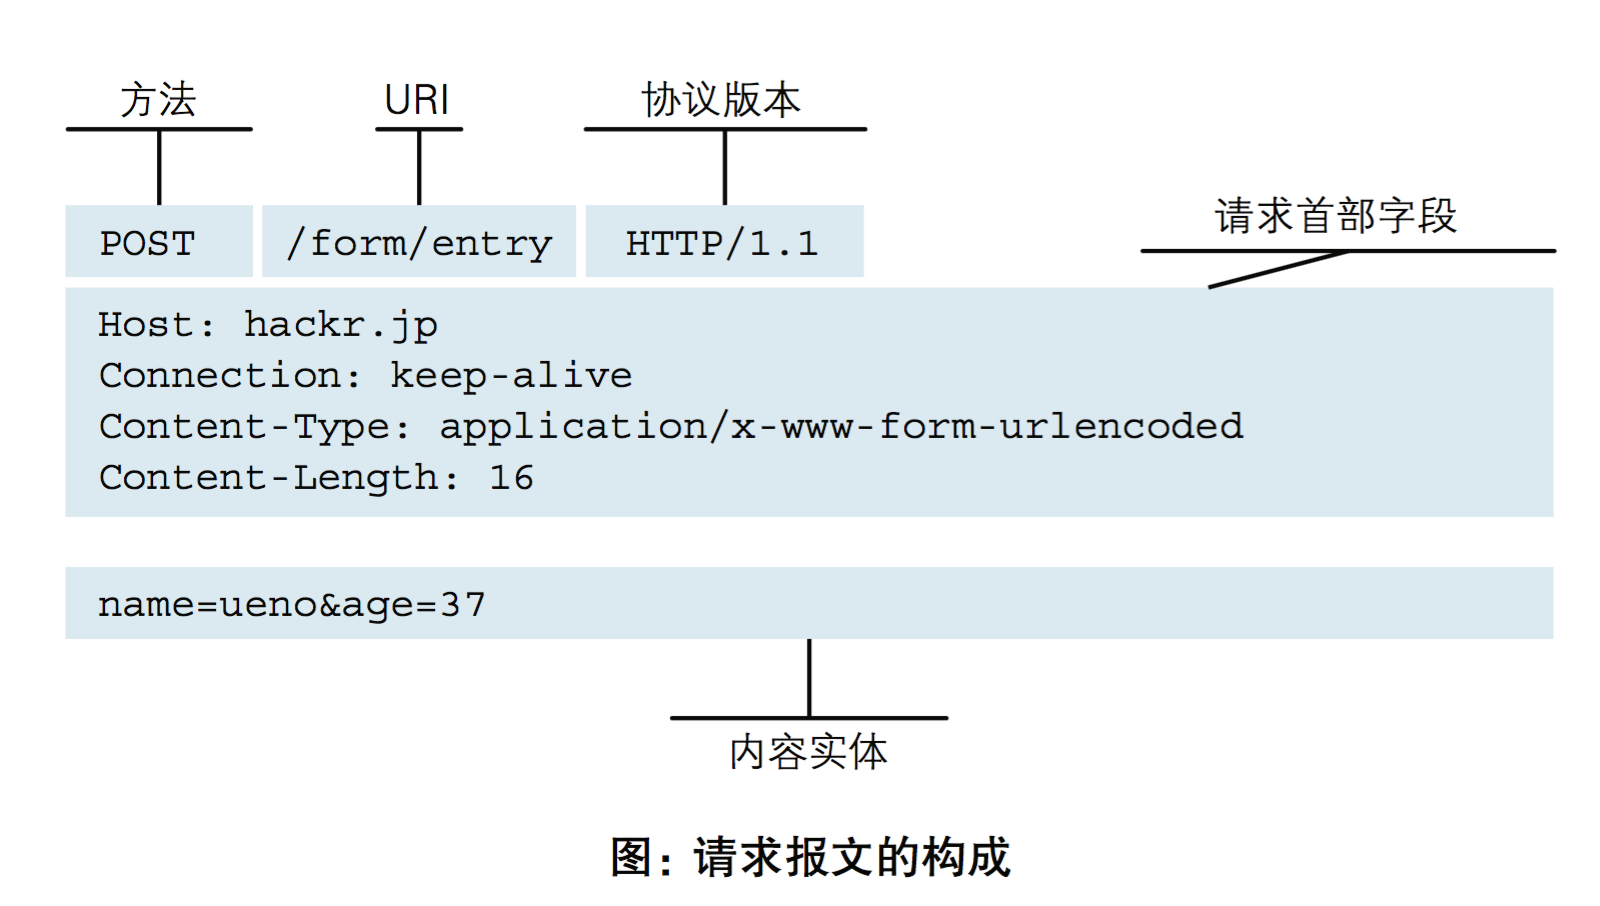

	



## 响应头

|响应头|	说明	|示例	|
|---|---|---|
|Access-Control-Allow-Origin|指定哪些网站可以跨域源资源共享|Access-Control-Allow-Origin: *	
|Cache-Control	|通知从服务器到客户端内的所有缓存机制，表示它们是否可以缓存这个对象及缓存有效时间。其单位为秒	|Cache-Control: max-age=3600	
|Content-Encoding|	响应资源所使用的编码类型。|Content-Encoding: gzip	
|Content-Length|	响应消息体的长度，用8进制字节表示|	Content-Length: 348	
|Content-Type| 当前内容的MIME类型| Content-Type: text/html; charset=utf-8	
|Date	|此条消息被发送时的日期和时间(以RFC 7231中定义的"HTTP日期"格式来表示)	|Date: Tue, 15 Nov 1994 08:12:31 GMT	
|ETag	|对于某个资源的某个特定版本的一个标识符，通常是一个消息散列	|ETag: "737060cd8c284d8af7ad3082f209582d"	
|Expires|指定一个日期/时间，超过该时间则认为此回应已经过期|	Expires: Thu, 01 Dec 1994 16:00:00 GMT	
|Last-Modified|所请求的对象的最后修改日期(按照 RFC 7231 中定义的“超文本传输协议日期”格式来表示)	|Last-Modified: Dec, 26 Dec 2015 17:30:00 GMT	
|Location|用于在进行重定向，或在创建了某个新资源时使用。|Location: http://www.itbilu.com/nodejs	
|Refresh|用于重定向，或者当一个新的资源被创建时。默认会在5秒后刷新重定向。|Refresh: 5; url=http://itbilu.com	
|Server	|服务器的名称	|Server: nginx/1.6.3	
|Set-Cookie	|设置HTTP cookie	|Set-Cookie: UserID=itbilu; Max-Age=3600; Version=1	
|Status	|通用网关接口的响应头字段，用来说明当前HTTP连接的响应状态。|Status: 200 OK	
|Transfer-Encoding|用表示实体传输给用户的编码形式。包括：chunked、compress、 deflate、gzip、identity。|	Transfer-Encoding: chunked	
|Upgrade| 要求客户端升级到另一个高版本协议。|Upgrade: HTTP/2.0, SHTTP/1.3, IRC/6.9, RTA/x11	

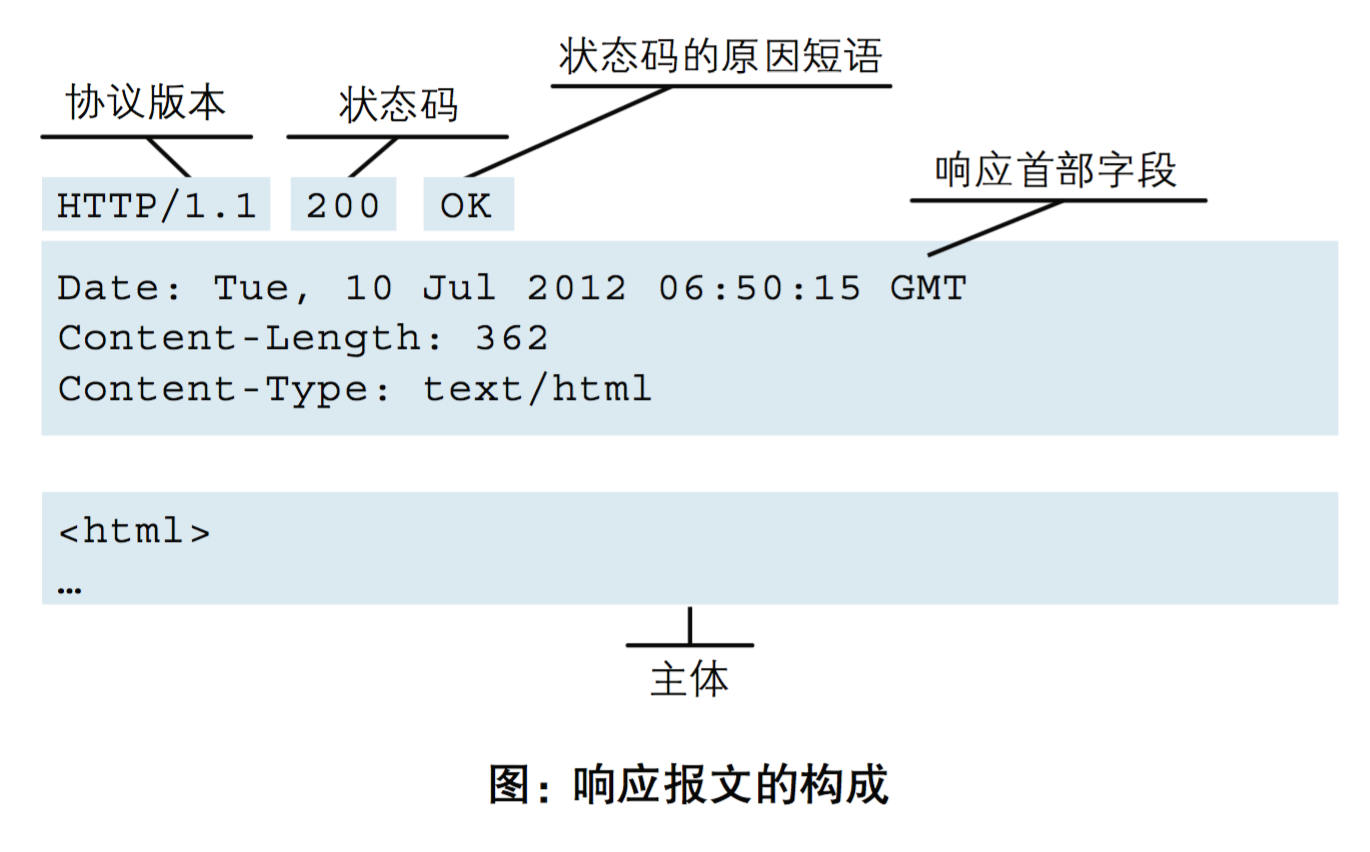

# 常见HTTP状态码

* 200 OK: 请求被成功处理，服务器会根据不同的请求方法返回结果：
    GET：请求的对应资源会作为响应返回。
    HEAD：请求的对应资源的响应头(entity-header)会作为响应返回,不包括响应体(message-body)。
    POST：返回处理对应请求的结果。

* 3XX 响应结果表明浏览器需要执行某些特殊的处理以完成请求。

  - 301 Movied Permanently
        永久性重定向。该状态码表示请求的资源已经被分配了新的URI，并且以后使用资源现在所指的URI。并且根据请求的方法有不同的处理方式：
        HEAD：必须在响应头部Location字段中指明新的永久性的URI。
        GET：除了有Location字段以外，还需要在响应体中附上永久性URI的超链接文本。
        POST：客户端在发送POST请求，受到301响应之后，不应该自动跳转URI，应当让用户确认跳转。
        比如，如果一个URI已经在浏览器中被收藏为书签，这时应该按照Location首部字段提示的URI重新保存。
        例如建立一个收藏的书签：http://wan.bigertech.com, 当访问这个书签的时候，请求会被重定向到. http://wan.meizu.com, 并且对应的书签会被改变，指向http://wan.meizu.com. 
  - 302 Found
        临时性重定向。该状态码表示请求的资源已被分配了新的URI，希望用户本次能使用新的URI访问。
        和301 Moved Permanently 状态码相似，但302状态码代表的资源不是被永久移动，只是临时性质的。
        如果，用户把一个URI收藏为书签，302响应是不会像301那样去更新书签。
  - 304 Not Modified  
  
    该状态码表示客户端发送附带条件请求时，服务器端允许请求访问资源，但未满足条件的情况。304状态码返回时，不包含任何响应的主题部分。附带条件的请求指的是采用GET方法的请求头中包含：If-Modified-Since、If-None-Match中任一首部。
    
    
    
* 4XX :4XX 的响应结果表明客户端是发生错误的原因所在
  - 400 Bad Request 
  
    表示该请求报文中存在语法错误，导致服务器无法理解该请求。客户端需要修改请求的内容后再次发送请求。
  - 401 Unauthorized 
  
    该状态码表示发送的请求需要有通过HTTP认证(Basic认证，Digest认证)的认证信息。返回含有401的响应，必须在头部包含WWW-Authenticate以指明服务器需要哪种方式的认证。当客户端再次请求该资源的时候，需要在请求头中的Authorization包含认证信息。更多关于认证授权的信息关注RFC2617
  - 403 Forbidden 
  
    该状态码表明对请求资源的访问被服务器拒绝了。服务器没有必要给出拒绝的详细理由，但如果想做说明的话，可以在实体的主体部分原因进行描述，这样就能让用户看到了。
  - 404 Not Found 
  
    该状态码表明服务器上无法找到指定的资源。通常是url输入不对，服务器没有对应的路由
    
* 5XX Server Error：5XX 的响应结果表明服务器本身发生错误，或者没有足够的能力来处理请求。
  - 500 Internal Server Error
  
    该状态码表明服务器端在执行请求时发生了错误。也有可能是Web应用存在的BUG或某些临时的故障。
  - 503 Service Unavailable
  
    该状态码表明服务器暂时处于超负载或正在进行停机维护，现在无法处理请求。如果事先得知解除以上需要的时间，最好写入Retry-After首部字段再返回给客户端。

# 一次完整的HTTP过程请求步骤

在浏览器输入url，回车一般经历如下步骤：
1. 缓存解析：浏览器获取了这个url，当然就去解析了，它先去缓存当中看看有没有，从 浏览器缓存-系统缓存-路由器缓存 当中查看，如果有从缓存当中显示页面
2. 域名解析
3. 建立TCP连接：三次握手建立连接。
4. Web浏览器向Web服务器发送请求：一旦建立了TCP连接，Web浏览器就会向Web服务器发送请求命令。例如：GET/sample/hello.jsp HTTP/1.1。
5. Web服务器应答 ：客户机向服务器发出请求后，服务器会客户机回送应答， HTTP/1.1 200 OK ，应答的第一部分是协议的版本号和应答状态码。
6. Web浏览器渲染 ：浏览器拿到响应字符串渲染成HTML
7. Web服务器关闭TCP连接：一般情况下，一旦Web服务器向浏览器发送了请求数据，它就要关闭TCP连接，然后如果浏览器或者服务器在其头信息加入了这行代码：Connection:keep-alive；TCP连接在发送后将仍然保持打开状态，于是，浏览器可以继续通过相同的连接发送请求。保持连接节省了为每个请求建立新连接所需的时间，还节约了网络带宽。
